In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data =pd.read_csv("../sensor_data/sensor_data_200.txt",delimiter=" ",header=None,names=("dates","times","ir","lidar"))
data

,dates,times,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [2]:
data["lidar"][0:5]

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64

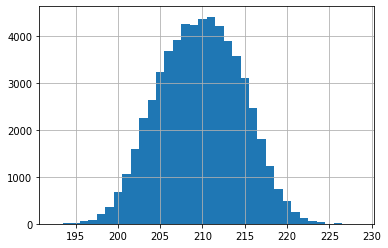

In [3]:
#画直方图
lidar = data["lidar"]
lidar.hist(bins=(max(lidar)-min(lidar)),align="left")
plt.show()

In [4]:
lidar[0:11]

0     214
1     211
2     199
3     208
4     212
5     212
6     215
7     218
8     208
9     217
10    215
Name: lidar, dtype: int64

In [5]:
#算均值
mean1=sum(lidar)/len(lidar)
mean2=lidar.mean()
mean1,mean2

(209.73713297619855, 209.73713297619855)

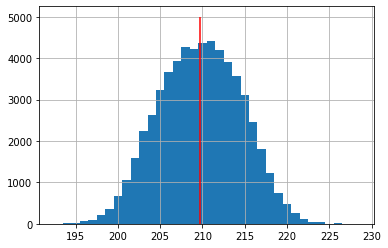

In [6]:
#画出均值
lidar.hist(bins=(max(lidar)-min(lidar)),align="left")
plt.vlines(mean2,ymin=0,ymax=5000,colors="r")
plt.show()

In [7]:
#方差计算
# 定义计算
zs = lidar.values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 样本方差
unbiased_var = sum(diff_square)/(len(zs)-1) # 无偏方差

print(sampling_var)
print(unbiased_var)

# Pandas使用
pandas_sampling_var = lidar.var(ddof=False) # 样本方差
pandas_default_var = lidar.var()        # 无偏方差

print(pandas_sampling_var)
print(pandas_default_var)

# NumPy使用
import numpy as np

numpy_default_var = np.var(lidar)  # 样本方差
numpy_unbiased_var = np.var(lidar, ddof=1)  # 无偏方差

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [9]:
#计算标准偏差
#定义计算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

#pandas计算
pandas_stddev =lidar.std()

stddev1,stddev1,pandas_stddev

(4.838151482774605, 4.838151482774605, 4.838192492920729)

In [14]:
#列出数据出现次数
freqs =pd.DataFrame(lidar.value_counts())
freqs.transpose()


,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [16]:
#计算各个数值出现概率
freqs["probs"]=freqs["lidar"]/len(lidar)
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [17]:
#确认概率和
sum(freqs["probs"])

1.0

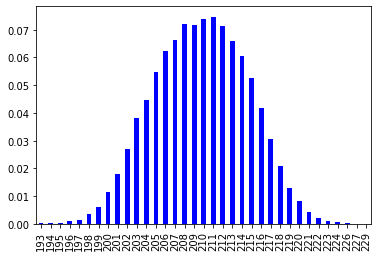

In [18]:
#概率直方图
freqs["probs"].sort_index().plot.bar(color="blue")   ###probdist###
plt.show()

In [19]:
#传感器数值模拟函数
def drawing():
    return freqs.sample(n=1,weights="probs").index[0]
drawing()

211

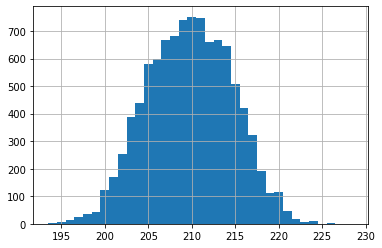

In [21]:
#模拟采样一万次
samples=[drawing() for i in range(10000)]
simulated =pd.DataFrame(samples,columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p),align="left")
plt.show()

In [22]:
#根据之前求出得传感器均值以及方差，设计一个正态分布计算 
def p(z, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

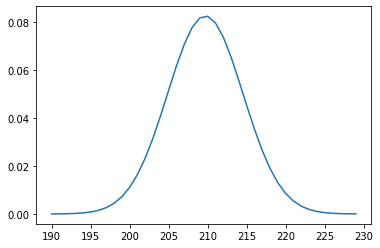

In [24]:
#计算190-230的分布
zs=range(190,230)
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

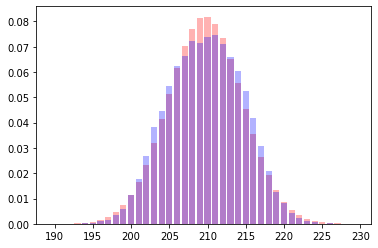

In [25]:
#把上面计算的带小数连续的概率分布，积分成整数分散的分布，也就是在整数x+-0.5以内的概率都积分成x的概率
#因为正态分布函数不好积分，所以直接用梯形公式来近似积分
#将正态分布积分的结果与前面计算的lidar数据的概率分布图做比较 正态分布概率图为红色，真值分布概率图为蓝色
def prob(z,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(z-width) + p(z+width) )

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys, color="red", alpha=0.3) #alpha设置图形透明率
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()


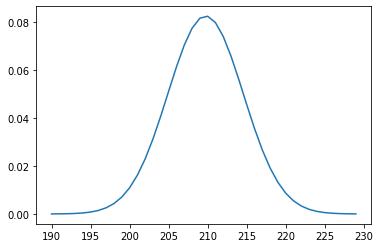

In [27]:
#用scipy来计算概率密度函数
#同样是需要方差以及标准偏差
from scipy.stats import norm

zs=range(190,230)
ys=[norm.pdf(z,mean1,stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

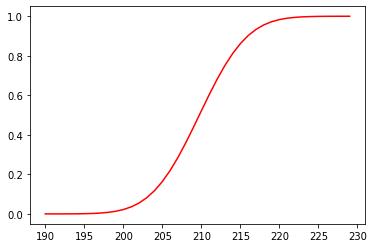

In [28]:
#用scipy来计算累积分布函数

zs = range(190,230)                                ###cdf###
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys, color="red") 
plt.show()

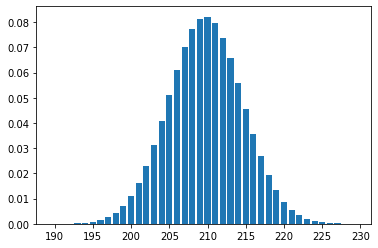

In [29]:
#可以用累积分布函数来完成刚才P函数的积分
zs = range(190,230)              ###prob_cdf###
ys = [norm.cdf(z+0.5, mean1, stddev1) -  norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs,ys)
plt.show()